In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [109]:
df = pd.read_csv('data/nike.csv')

ship_condition = df['shipping_available'] == True
df['shipping_available'] = np.where(ship_condition, "Shipping available", "In-person only")

outs_condition = df['outstanding'] == True
df['outstanding'] = np.where(outs_condition, "Outstanding", "Normal")

df.head()

,product_name,price,shipping_available,outstanding
0,Black and Orange Nike Pirate Tights,18.0,Shipping available,Outstanding
1,Black and White Nike Sneakers,30.0,In-person only,Normal
2,Nike White and Pink Sports Pants,8.0,Shipping available,Normal
3,Nike Basketball Ball,8.0,In-person only,Normal
4,Brown and Pink Nike Sneakers,30.0,In-person only,Normal


In [110]:
# Visual style
sns.set_theme(style="whitegrid", palette="crest")
plt.rcParams["figure.figsize"] = (12, 6)

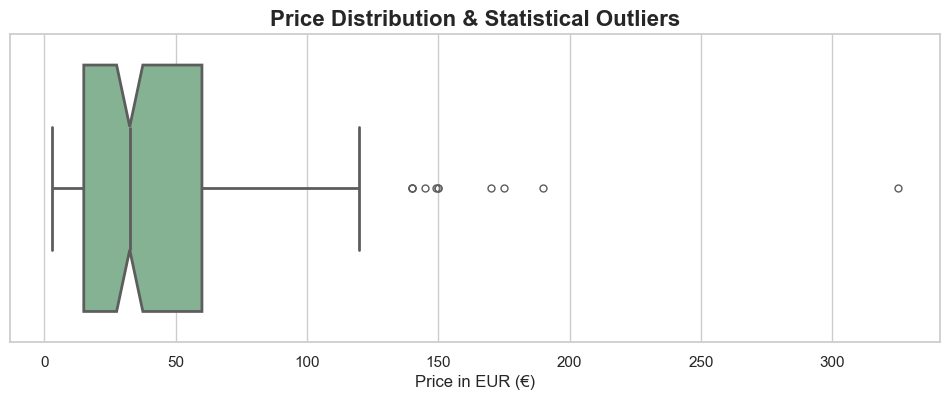

📈 Market Mean: 44.59€
🚩 Luxury/Outlier Threshold: > 127.50€


In [111]:
# Boxplot and Outlier Analysis (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 4))
sns.boxplot(x=df['price'], fliersize=5, linewidth=2, notch=True)
plt.title('Price Distribution & Statistical Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Price in EUR (€)', fontsize=12)
plt.show()

print(f"📈 Market Mean: {df['price'].mean():.2f}€")
print(f"🚩 Luxury/Outlier Threshold: > {upper_bound:.2f}€")

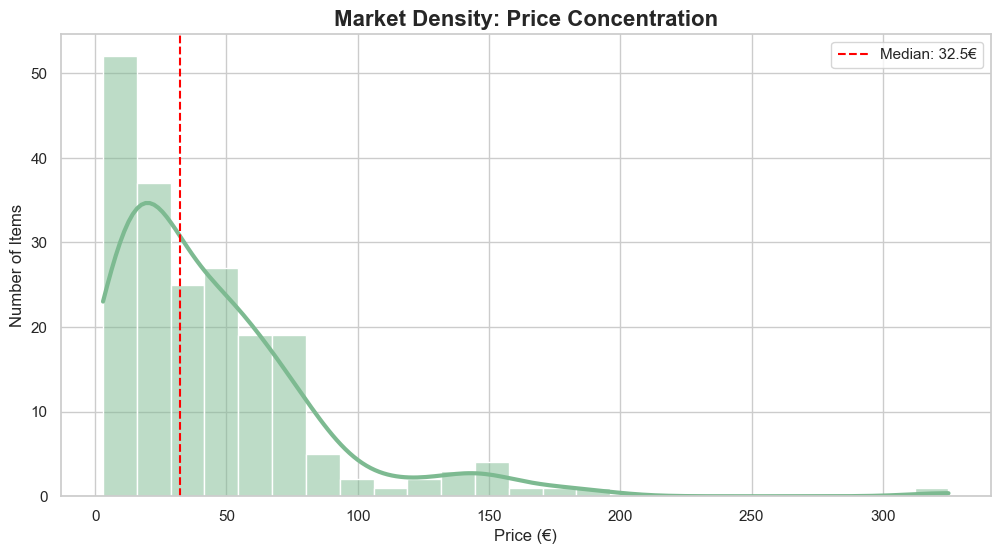

In [112]:
# Price density
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=25, line_kws={'lw': 3})
plt.axvline(df['price'].median(), color='red', linestyle='--', label=f'Median: {df['price'].median()}€')
plt.title('Market Density: Price Concentration', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.legend()
plt.show()

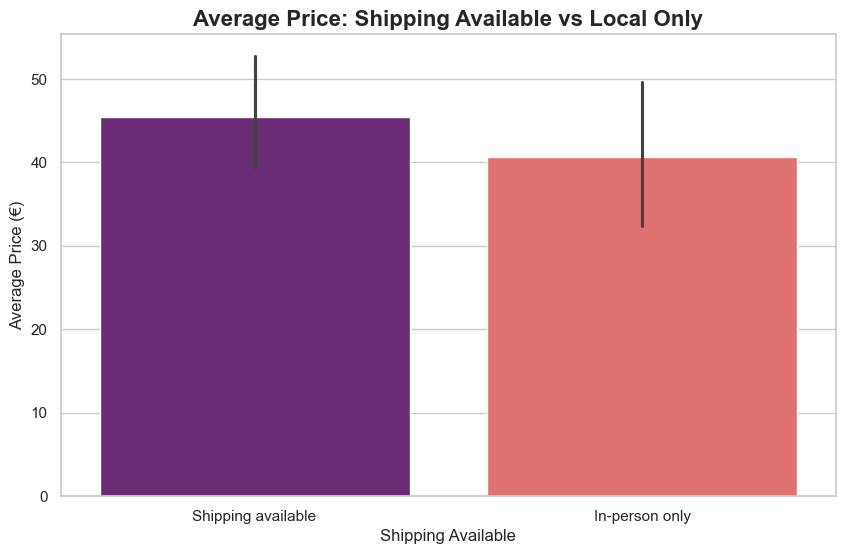

In [113]:
# Shipping Impact Analysis


plt.figure(figsize=(10, 6))
sns.barplot(x='shipping_available', y='price', data=df, hue='shipping_available', palette='magma', legend=False)
plt.title('Average Price: Shipping Available vs Local Only', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Available', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
plt.show()

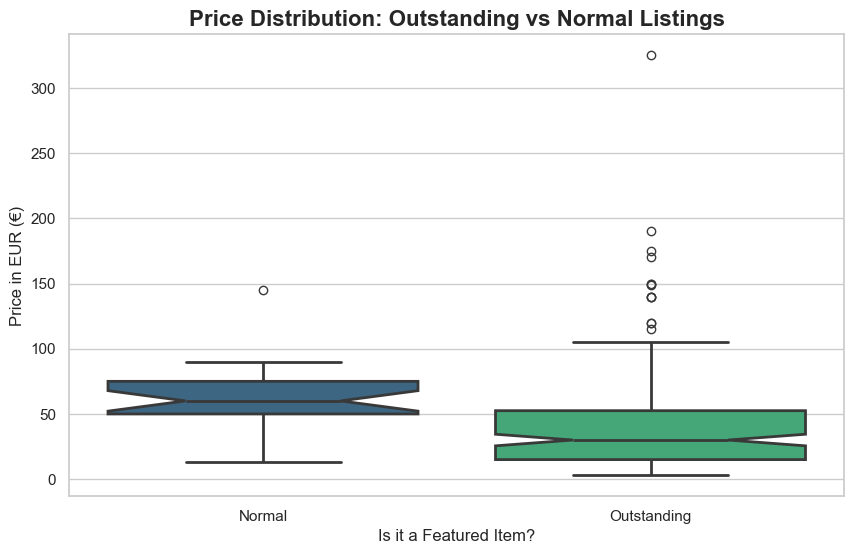

📊 Median Price (Normal): 30.00€
🚀 Median Price (Outstanding): 60.00€
💰 Average surcharge (Outstanding)': 30.00€


In [119]:
# Compare outstanding status vs price
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='outstanding',
    y='price',
    data=df,
    hue='outstanding',
    palette='viridis',
    legend=False,
    linewidth=2,
    notch=True
)
plt.title('Price Distribution: Outstanding vs Normal Listings', fontsize=16, fontweight='bold')
plt.xlabel('Is it a Featured Item?', fontsize=12)
plt.ylabel('Price in EUR (€)', fontsize=12)
plt.xticks([0, 1], ['Normal', 'Outstanding'], fontsize=11)

plt.show()

medians = df.groupby('outstanding')['price'].median()
standard_med = medians['Normal']
featured_med = medians['Outstanding']

print(f"📊 Median Price (Normal): {standard_med:.2f}€")
if featured_med > 0:
    diff = featured_med - standard_med
    print(f"🚀 Median Price (Outstanding): {featured_med:.2f}€")
    print(f"💰 Average surcharge (Outstanding)': {diff:.2f}€")